# Swish-based classifier using cosine-annealed LR with restarts and data augmentation
- Swish activation, 4 layers, 100 neurons per layer
- LR using cosine-annealing with restarts and cycle multiplicity of 2
- Data is augmentaed via phi rotations, and transvers and longitudinal flips
- Validation score use ensemble of 10 models weighted by loss

### Import modules

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
from __future__ import division
import sys
import os
sys.path.append('../')
from modules.basics import *
from modules.class_basics import *

Using TensorFlow backend.


## Options

In [2]:
with open(DATA_PATH/'feats.pkl', 'rb') as fin:
    train_feats = pickle.load(fin)
    train_feats = [var for x in train_feats for var in train_feats[x]]

In [3]:
n_models = 10
patience = 2
max_epochs = 200

ensemble_size = 10
ensemble_mode = 'loss'

compile_args = {'loss':'binary_crossentropy', 'optimizer':'adam'}
train_params = {'epochs' : 1, 'batch_size' : 256, 'verbose' : 0}
model_params = {'version':'modelSwish', 'n_in':len(train_feats), 'compile_args':compile_args, 'mode':'classifier'}

print ("\nTraining on", len(train_feats), "features:", [var for var in train_feats])


Training on 31 features: ['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt', 'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality', 'DER_lep_eta_centrality', 'PRI_met_pt', 'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_all_pt', 'PRI_tau_px', 'PRI_tau_py', 'PRI_tau_pz', 'PRI_lep_px', 'PRI_lep_py', 'PRI_lep_pz', 'PRI_jet_leading_px', 'PRI_jet_leading_py', 'PRI_jet_leading_pz', 'PRI_jet_subleading_px', 'PRI_jet_subleading_py', 'PRI_jet_subleading_pz', 'PRI_met_px', 'PRI_met_py']


## Import data

In [4]:
train_fy = HEPAugFoldYielder(train_feats, h5py.File(DATA_PATH/'train.hdf5', "r+"), rot_mult=8)

Augmenting via phi rotations
Augmenting via y flips
Augmenting via longitunidnal flips
Total augmentation multiplicity is 32


/Users/giles/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:448: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())
/Users/giles/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:448: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


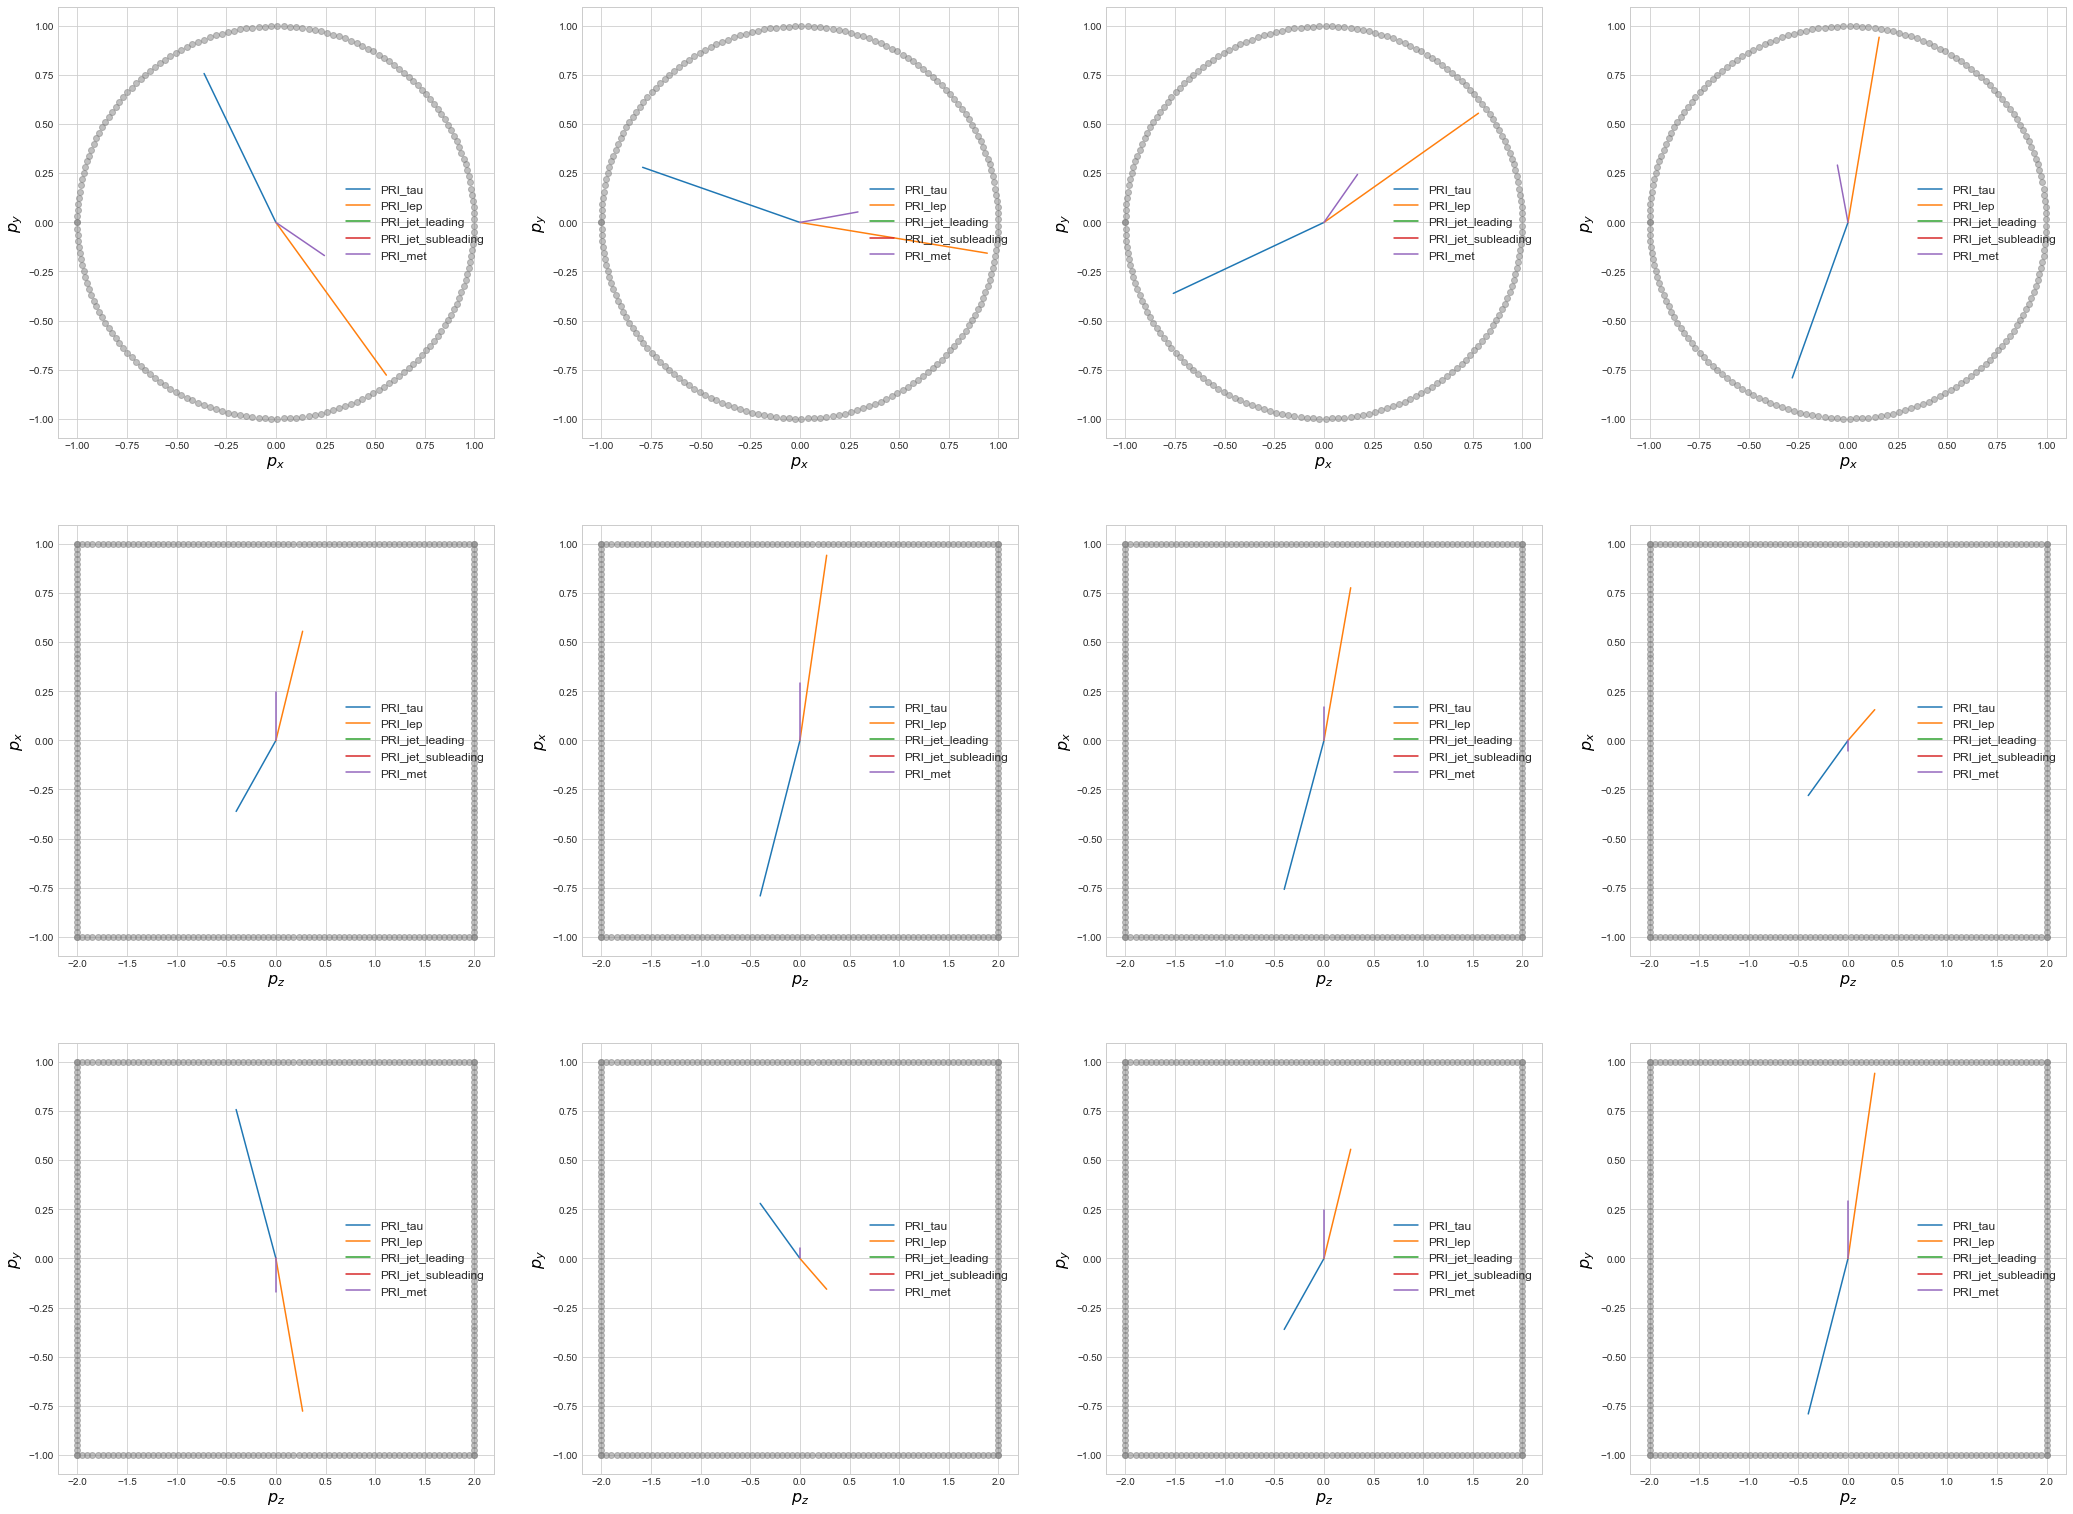

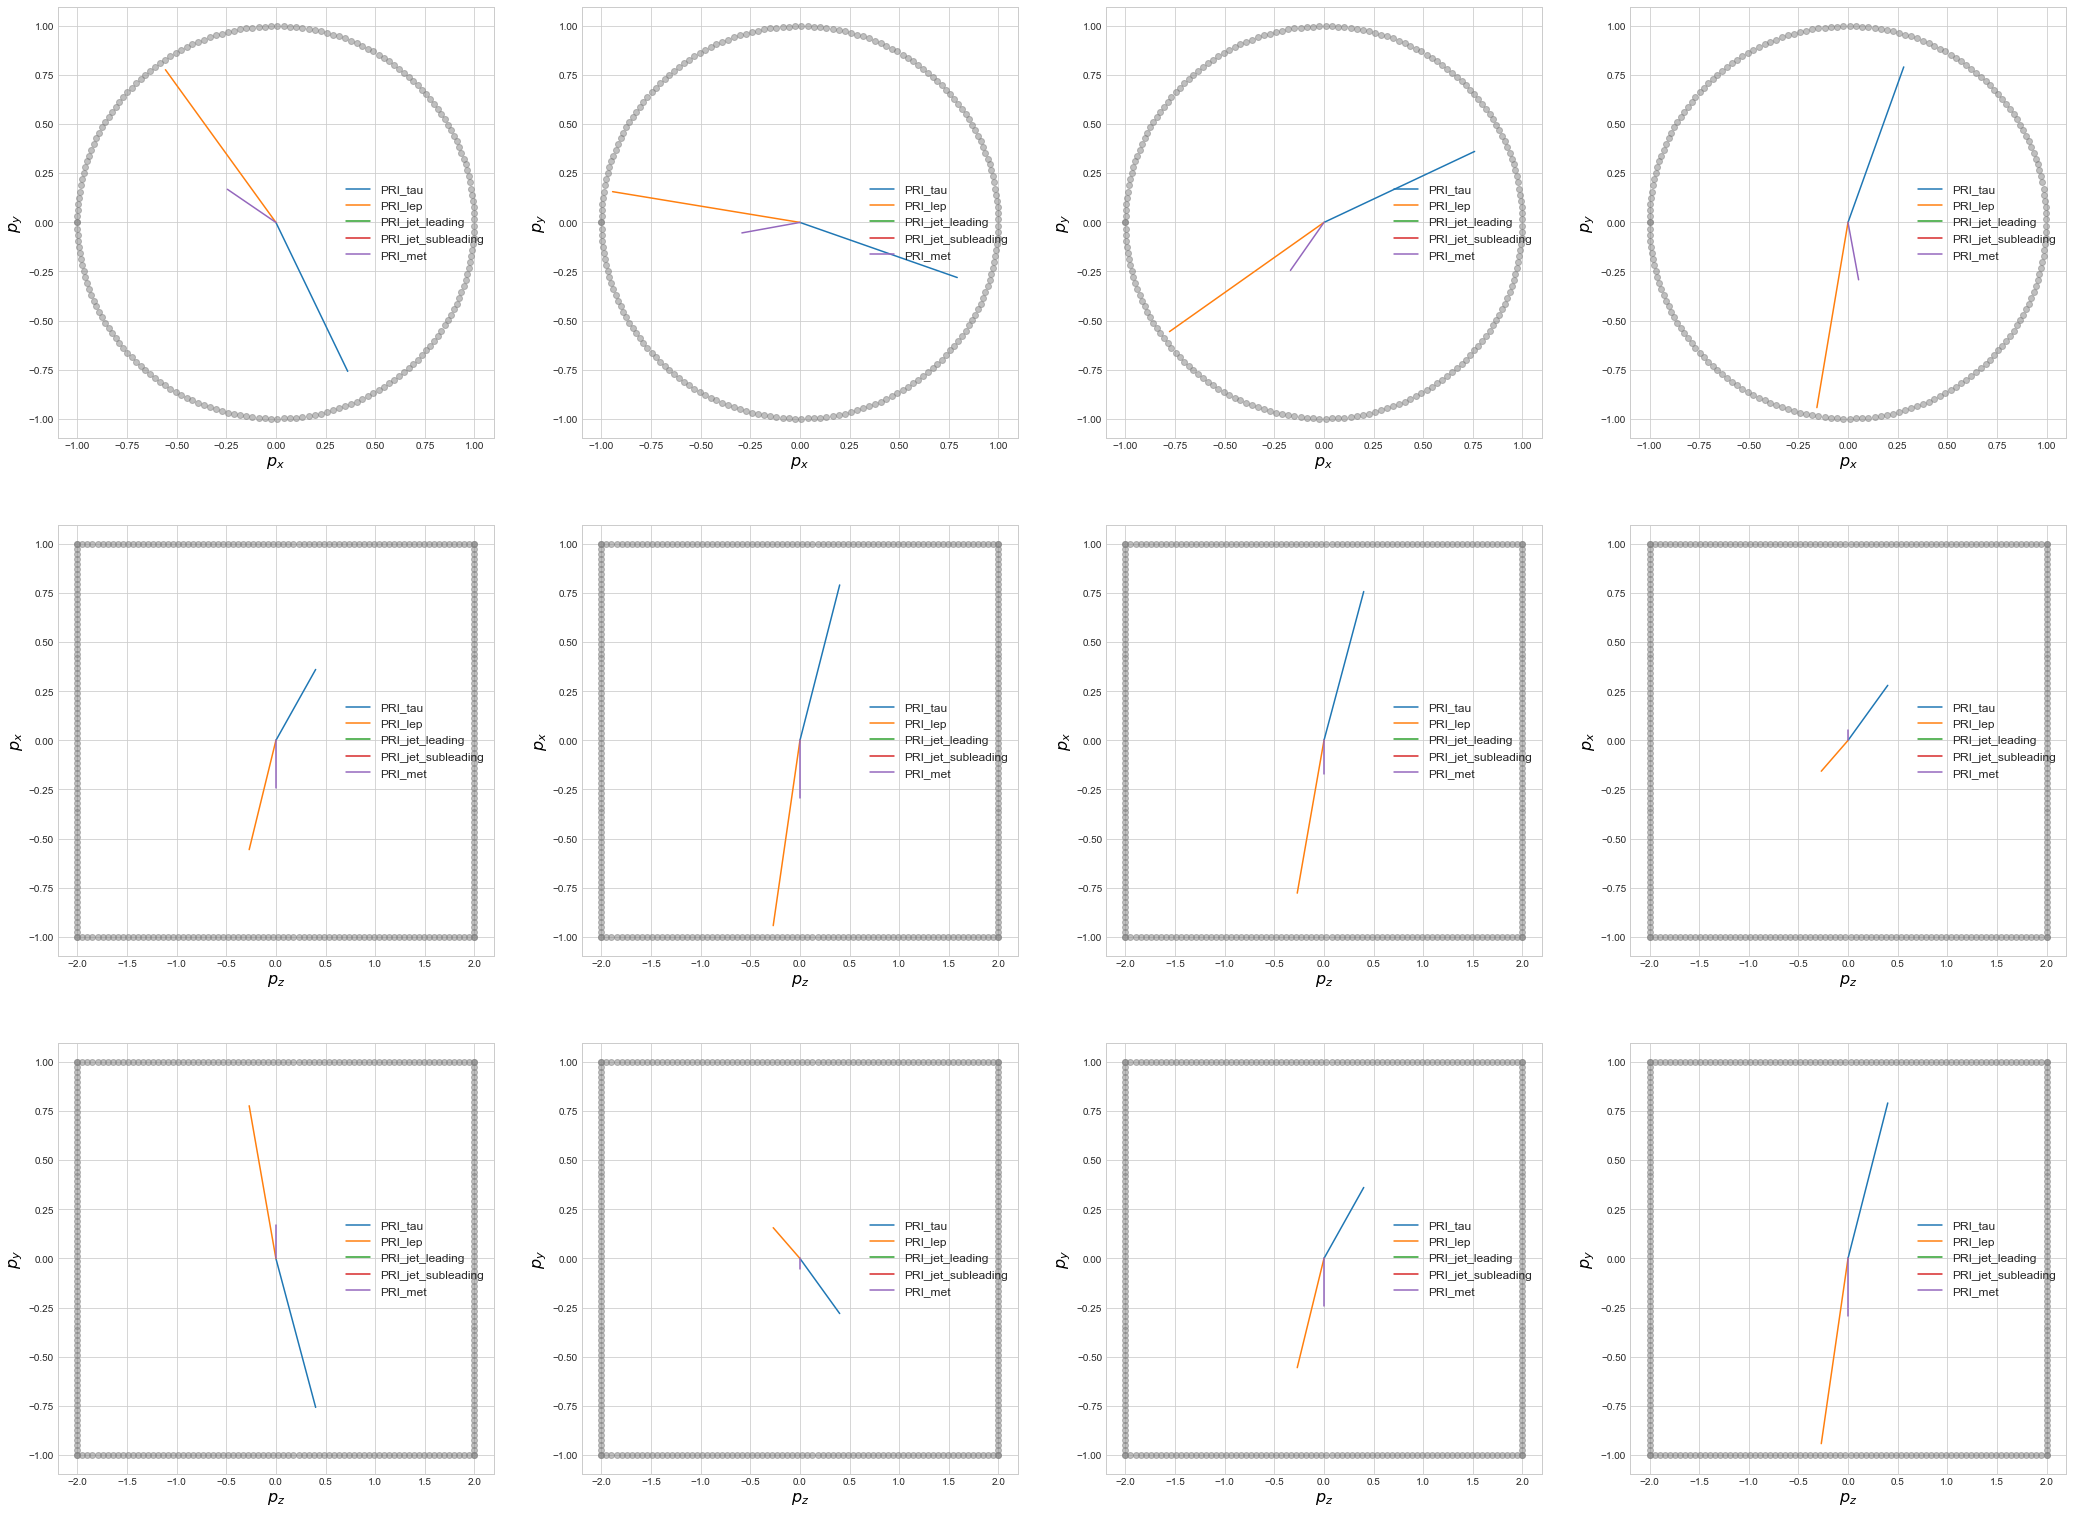

In [5]:
id=3
aug_ranges = [range(4), range(4,8)]
for aug_range in aug_ranges:
    comp_events([pd.DataFrame(train_fy.get_test_fold(0, i)['inputs'], columns=train_feats)[id:id+1] for i in aug_range])

## Determine LR

2 classes found, running in binary mode



/Users/giles/anaconda3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)
No handles with labels found to put in legend.



______________________________________
Training finished
Cross-validation took 11.678s 


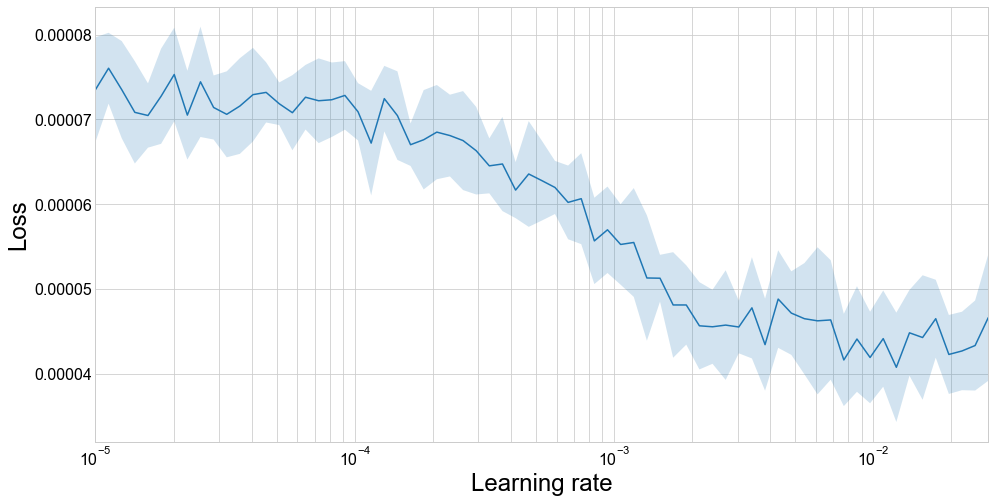

______________________________________



In [6]:
lr_finder = fold_lr_find(train_fy, get_model, model_params, train_params,
                         lr_bounds=[1e-5,1e-1], train_on_weights=True, verbose=0)

## Train classifier

In [5]:
model_gen_params = {**model_params, 'compile_args':{**compile_args, 'lr':2e-3}}
use_callbacks = {'CosAnnealLR':{'cycle_mult':2, 'reverse':False, 'redux_decay':True}}
ams_args = {'n_total':250000, 'br':10, 'delta_b':0}
plots = ['history', 'lr']

Training using weights
Training model 1 / 10
Using cosine LR annealing
2 classes found, running in binary mode

Saving snapshot 1
1 New best found: 3.962891096636684e-05
2 New best found: 3.644150815402777e-05
Saving snapshot 2
3 New best found: 3.578572745111346e-05
4 New best found: 3.5515460192593655e-05
5 New best found: 3.479601772997259e-05
6 New best found: 3.420344180994925e-05
Saving snapshot 3
7 New best found: 3.4089715133321835e-05
10 New best found: 3.3827683705547994e-05
11 New best found: 3.34951028003162e-05
12 New best found: 3.327534086512057e-05
13 New best found: 3.3149211670192154e-05
14 New best found: 3.306996345515241e-05
Saving snapshot 4
15 New best found: 3.305351546226073e-05
21 New best found: 3.301025779147847e-05
23 New best found: 3.284533994088557e-05
24 New best found: 3.2675053558356265e-05
25 New best found: 3.2604903148655216e-05
27 New best found: 3.2362349907044745e-05
28 New best found: 3.228886942335424e-05
29 New best found: 3.2230715539867905e

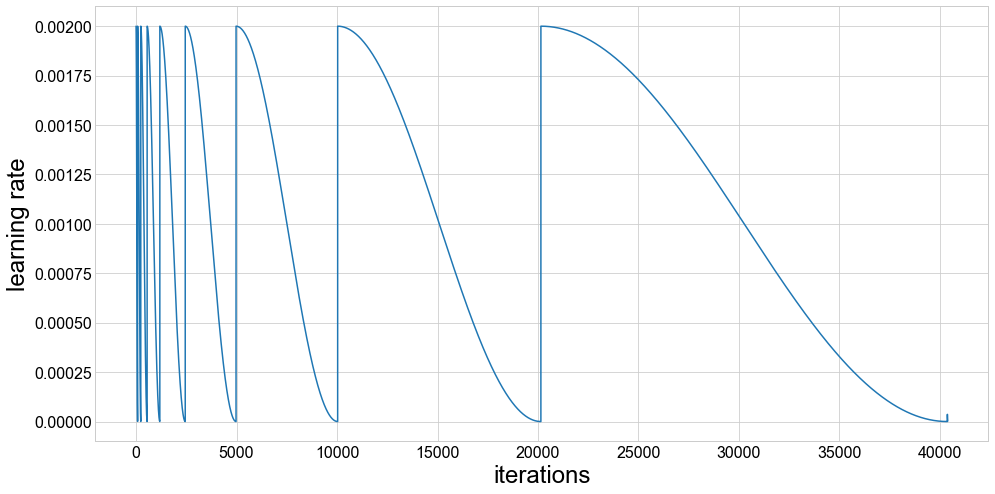

Fold took 236.828s

Training model 2 / 10
Using cosine LR annealing
Saving snapshot 1
1 New best found: 3.96162452198175e-05
2 New best found: 3.691972725471665e-05
Saving snapshot 2
3 New best found: 3.580490123321227e-05
4 New best found: 3.579043308003135e-05
5 New best found: 3.5121149525080744e-05
6 New best found: 3.4485827553071974e-05
Saving snapshot 3
7 New best found: 3.432384415683553e-05
10 New best found: 3.400705066598522e-05
11 New best found: 3.386732252825271e-05
12 New best found: 3.332652849596367e-05
14 New best found: 3.3259327338230816e-05
Saving snapshot 4
15 New best found: 3.3233604787169664e-05
23 New best found: 3.294817527590431e-05
24 New best found: 3.294754983211773e-05
26 New best found: 3.285073343879972e-05
27 New best found: 3.27203996444098e-05
28 New best found: 3.2691700678650343e-05
29 New best found: 3.2679966938547104e-05
30 New best found: 3.2619111967647035e-05
Saving snapshot 5
48 New best found: 3.2607621467697855e-05
51 New best found: 3.25

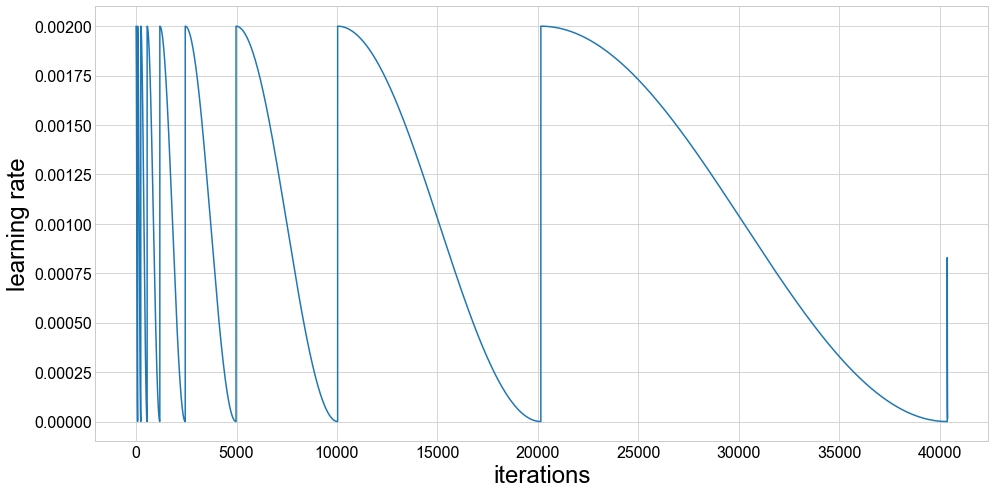

Fold took 235.133s

Training model 3 / 10
Using cosine LR annealing
Saving snapshot 1
1 New best found: 3.906361924018711e-05
2 New best found: 3.5844409701530823e-05
Saving snapshot 2
3 New best found: 3.525247025972931e-05
5 New best found: 3.4559757309034465e-05
6 New best found: 3.4053237391344735e-05
Saving snapshot 3
7 New best found: 3.3904334010730965e-05
11 New best found: 3.321235421753954e-05
12 New best found: 3.318554238212528e-05
13 New best found: 3.2892800377157986e-05
14 New best found: 3.281933047837811e-05
Saving snapshot 4
15 New best found: 3.278556887089508e-05
20 New best found: 3.262296993198106e-05
24 New best found: 3.2450963683368174e-05
25 New best found: 3.24007512172102e-05
26 New best found: 3.230262586439494e-05
27 New best found: 3.221736641862663e-05
29 New best found: 3.215024897508556e-05
30 New best found: 3.2110685155203104e-05
Saving snapshot 5
31 New best found: 3.211031671598903e-05
48 New best found: 3.20597367855953e-05
52 New best found: 3.20

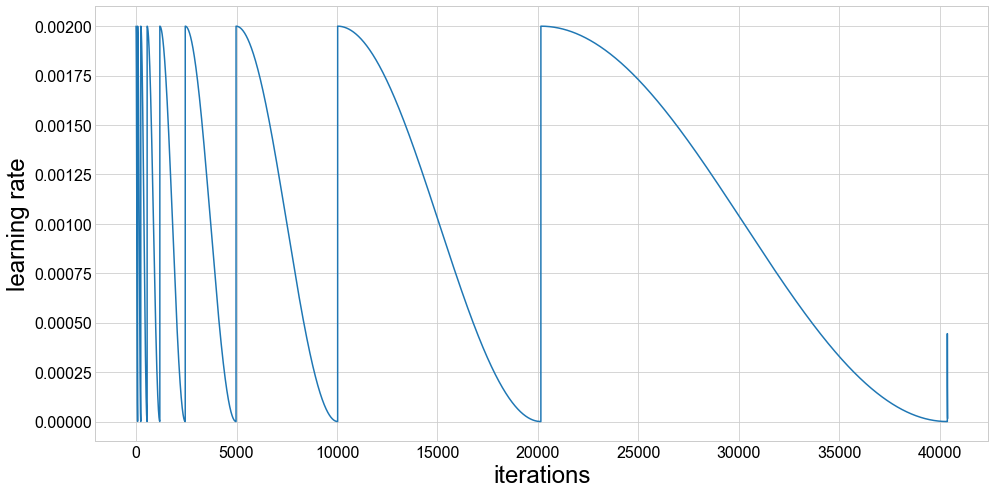

Fold took 231.712s

Training model 4 / 10
Using cosine LR annealing
Saving snapshot 1
1 New best found: 3.8806681510939446e-05
2 New best found: 3.681730258396303e-05
Saving snapshot 2
3 New best found: 3.588827945643803e-05
4 New best found: 3.525460229926287e-05
5 New best found: 3.448149388184293e-05
6 New best found: 3.4322104911072506e-05
Saving snapshot 3
7 New best found: 3.417369234648954e-05
11 New best found: 3.342598576491666e-05
12 New best found: 3.338724251358886e-05
13 New best found: 3.30734242946429e-05
14 New best found: 3.3003259908401735e-05
Saving snapshot 4
15 New best found: 3.2976960924497014e-05
21 New best found: 3.295537549886643e-05
22 New best found: 3.293283261957189e-05
23 New best found: 3.292370430188882e-05
24 New best found: 3.2879782862054325e-05
25 New best found: 3.266069295094307e-05
28 New best found: 3.260964304671268e-05
29 New best found: 3.25680542252628e-05
Saving snapshot 5
31 New best found: 3.256639957121494e-05
46 New best found: 3.25303

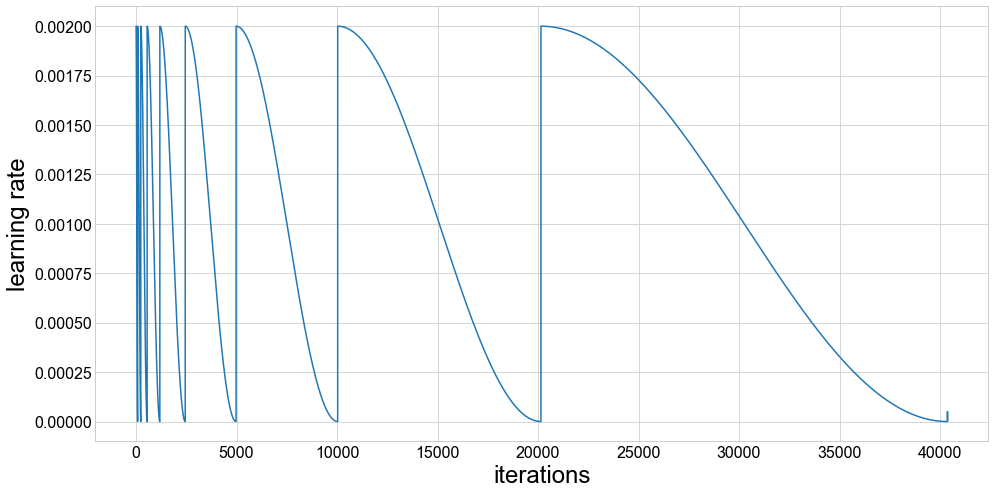

Fold took 231.433s

Training model 5 / 10
Using cosine LR annealing
Saving snapshot 1
1 New best found: 4.0307872441033404e-05
2 New best found: 3.7240025951442597e-05
Saving snapshot 2
3 New best found: 3.6701861698142094e-05
4 New best found: 3.65960952399264e-05
5 New best found: 3.58781144962474e-05
6 New best found: 3.537519502317478e-05
Saving snapshot 3
7 New best found: 3.529998168785023e-05
10 New best found: 3.5244657877960716e-05
12 New best found: 3.482231068567194e-05
13 New best found: 3.467748780398949e-05
14 New best found: 3.4538357651906945e-05
Saving snapshot 4
15 New best found: 3.452267563612696e-05
23 New best found: 3.4433860083797694e-05
25 New best found: 3.4266719888738593e-05
27 New best found: 3.422517593410693e-05
29 New best found: 3.407882153827394e-05
30 New best found: 3.407150465119276e-05
Saving snapshot 5
31 New best found: 3.4053846138724564e-05
48 New best found: 3.400993929053766e-05
50 New best found: 3.400707053442128e-05
52 New best found: 3.39

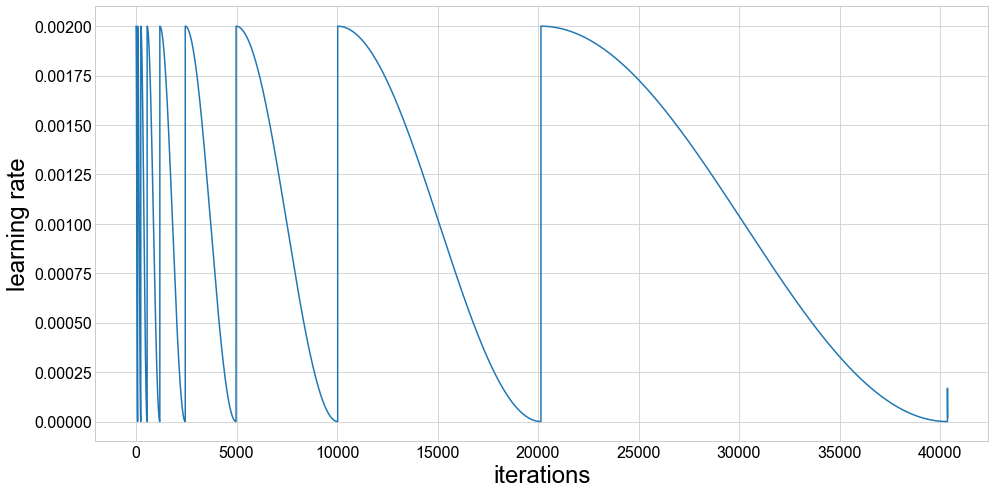

Fold took 246.925s

Training model 6 / 10
Using cosine LR annealing
Saving snapshot 1
1 New best found: 3.871417577902321e-05
2 New best found: 3.6049648829794023e-05
Saving snapshot 2
3 New best found: 3.550522199802799e-05
4 New best found: 3.5315477673429995e-05
5 New best found: 3.520707498391857e-05
6 New best found: 3.4171174358925784e-05
Saving snapshot 3
7 New best found: 3.385489953652723e-05
11 New best found: 3.363224561471725e-05
12 New best found: 3.329213128454285e-05
13 New best found: 3.325346847850596e-05
14 New best found: 3.311107774934499e-05
Saving snapshot 4
15 New best found: 3.31085891724797e-05
22 New best found: 3.299225206574192e-05
23 New best found: 3.286492450424703e-05
25 New best found: 3.276382235635537e-05
26 New best found: 3.27282743237447e-05
27 New best found: 3.264655875973404e-05
28 New best found: 3.2541971384489446e-05
29 New best found: 3.249878538335906e-05
30 New best found: 3.246270228846697e-05
Saving snapshot 5
31 New best found: 3.245635

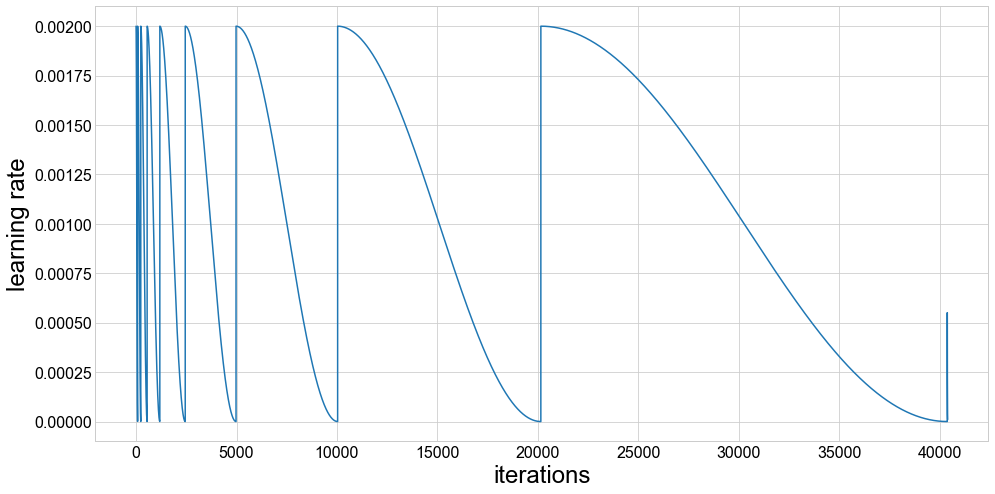

Fold took 258.256s

Training model 7 / 10
Using cosine LR annealing
Saving snapshot 1
1 New best found: 4.079374221567347e-05
2 New best found: 3.7350415960570404e-05
Saving snapshot 2
3 New best found: 3.6351107228389076e-05
4 New best found: 3.5961578832799214e-05
5 New best found: 3.5232896744837435e-05
6 New best found: 3.468012630330017e-05
Saving snapshot 3
7 New best found: 3.461377716908016e-05
10 New best found: 3.424257708456164e-05
11 New best found: 3.403309891412003e-05
12 New best found: 3.377583662008412e-05
13 New best found: 3.371019171867059e-05
14 New best found: 3.349917505893253e-05
Saving snapshot 4
15 New best found: 3.348515218087047e-05
20 New best found: 3.341374665101419e-05
24 New best found: 3.3237772107444766e-05
25 New best found: 3.31199241823356e-05
27 New best found: 3.300891986013055e-05
28 New best found: 3.296184321899808e-05
29 New best found: 3.288958238230125e-05
30 New best found: 3.2865491434643675e-05
Saving snapshot 5
31 New best found: 3.286

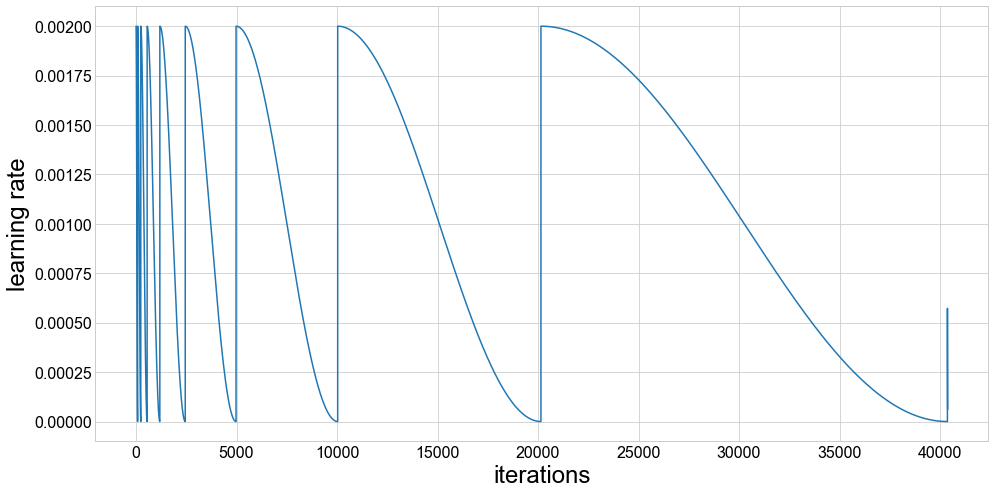

Fold took 255.056s

Training model 8 / 10
Using cosine LR annealing
Saving snapshot 1
1 New best found: 3.816238338978477e-05
2 New best found: 3.637458046351526e-05
Saving snapshot 2
3 New best found: 3.5685231126743186e-05
4 New best found: 3.504582975153048e-05
5 New best found: 3.469248839766759e-05
6 New best found: 3.4237925770753275e-05
Saving snapshot 3
7 New best found: 3.407939642004892e-05
10 New best found: 3.366134500830609e-05
11 New best found: 3.337368822132071e-05
12 New best found: 3.328645992031533e-05
13 New best found: 3.311595550667991e-05
14 New best found: 3.2975593636576204e-05
Saving snapshot 4
15 New best found: 3.2956220521904076e-05
22 New best found: 3.288807460359939e-05
23 New best found: 3.269056961914498e-05
24 New best found: 3.249331390381768e-05
26 New best found: 3.2478003324026834e-05
27 New best found: 3.224962851170585e-05
28 New best found: 3.2183568450624754e-05
Saving snapshot 5
47 New best found: 3.1941841429127815e-05
50 New best found: 3.1

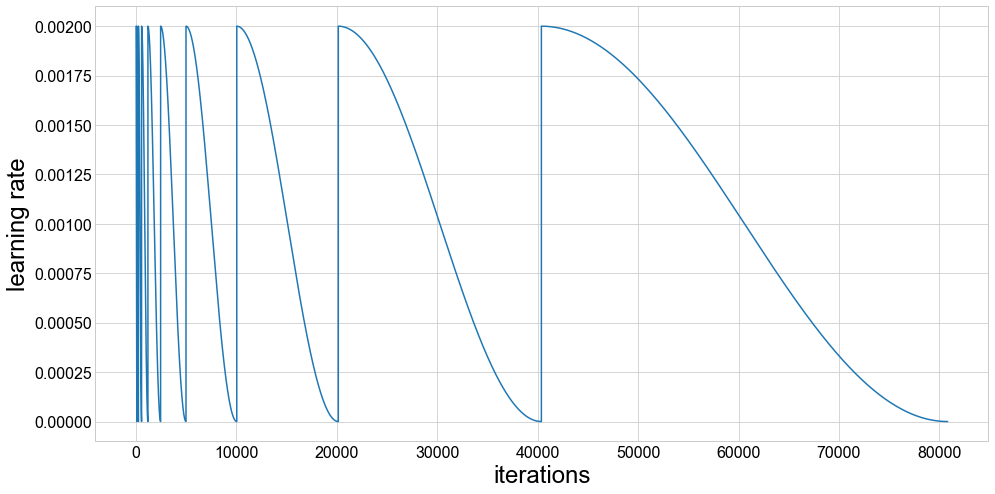

Fold took 522.700s

Training model 9 / 10
Using cosine LR annealing
Saving snapshot 1
1 New best found: 3.81343763860059e-05
2 New best found: 3.538908331829589e-05
Saving snapshot 2
3 New best found: 3.4788209716498385e-05
4 New best found: 3.4503494361706544e-05
5 New best found: 3.360420376411639e-05
6 New best found: 3.349476007715566e-05
Saving snapshot 3
7 New best found: 3.298735461285105e-05
10 New best found: 3.27260760095669e-05
12 New best found: 3.243726112996228e-05
13 New best found: 3.216557205887511e-05
14 New best found: 3.204474883095827e-05
Saving snapshot 4
15 New best found: 3.2030494611535685e-05
21 New best found: 3.1892528220487294e-05
23 New best found: 3.183225718385074e-05
24 New best found: 3.158811533648987e-05
25 New best found: 3.1572437917930077e-05
27 New best found: 3.1548465334344655e-05
30 New best found: 3.152827349549625e-05
Saving snapshot 5
31 New best found: 3.150754895614227e-05
45 New best found: 3.146704318496631e-05
48 New best found: 3.1162

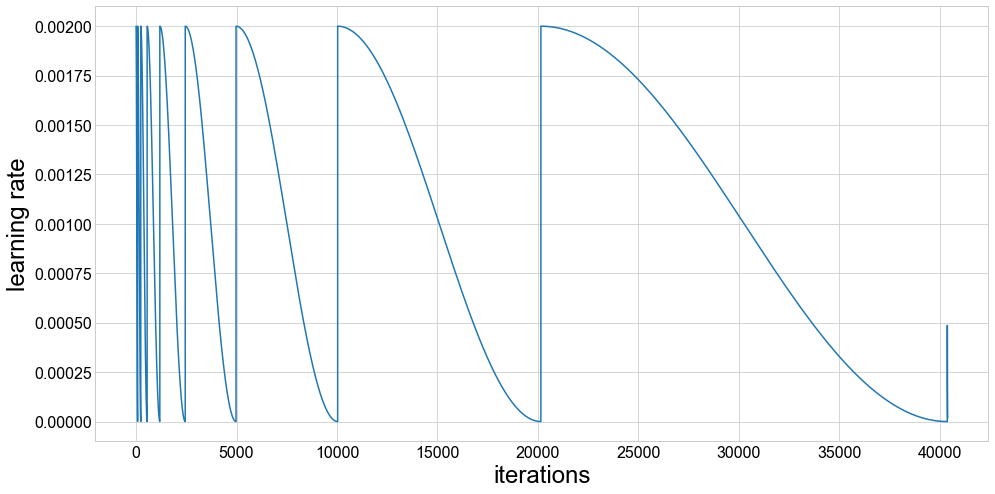

Fold took 270.772s

Training model 10 / 10
Using cosine LR annealing
Saving snapshot 1
1 New best found: 3.9550768909975884e-05
2 New best found: 3.743783644895302e-05
Saving snapshot 2
3 New best found: 3.658162356732646e-05
5 New best found: 3.581127503857715e-05
6 New best found: 3.5004516180197244e-05
Saving snapshot 3
7 New best found: 3.497316515422426e-05
10 New best found: 3.478120617219247e-05
11 New best found: 3.4623131691478195e-05
12 New best found: 3.4359197052253876e-05
13 New best found: 3.387198601121781e-05
14 New best found: 3.3801042354025415e-05
Saving snapshot 4
15 New best found: 3.379476223926758e-05
26 New best found: 3.353049794532126e-05
27 New best found: 3.336896163818892e-05
29 New best found: 3.330856109241722e-05
30 New best found: 3.3254256506916135e-05
Saving snapshot 5
31 New best found: 3.325235620577587e-05
48 New best found: 3.312005782936467e-05
50 New best found: 3.290092490933603e-05
51 New best found: 3.2878133004123814e-05
55 New best found: 3

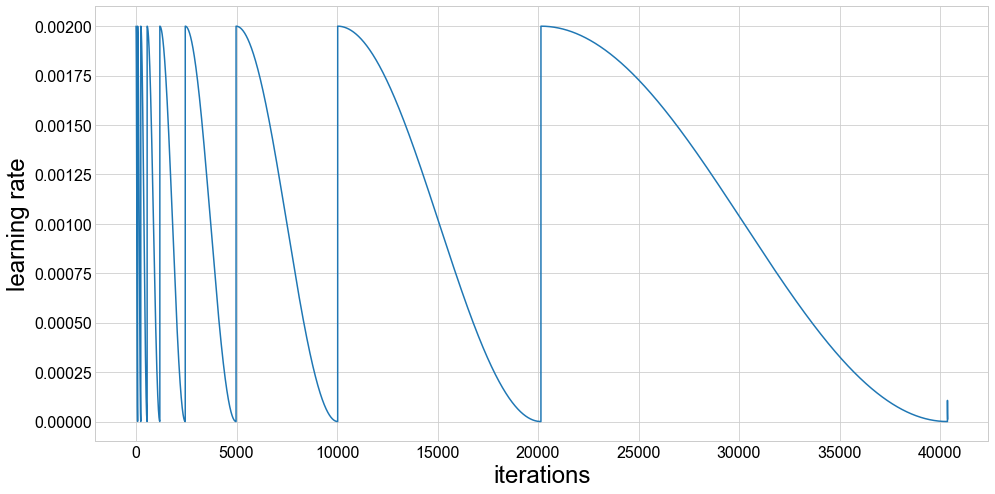

Fold took 281.193s


______________________________________
Training finished
Cross-validation took 2770.140s 


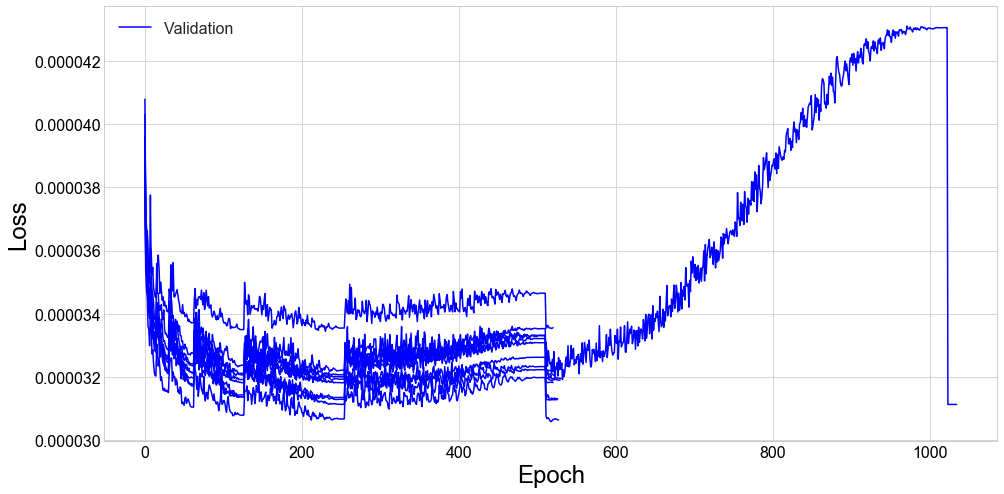

Mean loss = 3.18e-05 +- 2e-07
Mean wAUC = 0.0633 +- 0.0009
Mean AUC = 0.0981 +- 0.0008
Mean AMS = 3.95 +- 0.1
Mean cut = 0.964 +- 0.004
______________________________________



<Figure size 432x288 with 0 Axes>

In [7]:
results, histories, cycle_losses = fold_train_model(train_fy, n_models,
                                                    model_gen_params=model_gen_params,
                                                    train_params=train_params, train_on_weights=True,
                                                    use_callbacks=use_callbacks, ams_args=ams_args,
                                                    max_epochs=max_epochs, patience=patience,
                                                    verbose=1, plots=plots)

## Construct ensemble

In [4]:
with open('train_weights/results_file.pkl', 'rb') as fin:   
    results = pickle.load(fin)
with open('train_weights/cycle_file.pkl', 'rb') as fin:   
    cycle_losses = pickle.load(fin)

In [95]:
ensemble, weights = assemble_ensemble(results, 2, ensemble_mode, compile_args, weighting='reciprocal')


Choosing ensemble by loss


/Users/giles/anaconda3/lib/python3.6/site-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


Model 0 is 8 with loss = 3.0590213614777895e-05
Model 1 is 7 with loss = 3.113163185295043e-05


/Users/giles/anaconda3/lib/python3.6/site-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [5]:
def test_ensemble(weighting, size, rot_mult):
    ensemble, weights = assemble_ensemble(results, size, ensemble_mode, compile_args, weighting=weighting, verbose=0)
    val_fy = HEPAugFoldYielder(train_feats, h5py.File(DATA_PATH/'val.hdf5', "r+"), rot_mult=rot_mult)
    fold_ensemble_predict(ensemble, weights, val_fy, pred_name='pred_TTA', ensemble_size=ensemble_size, verbose=0)
    val_df_tta = convert_to_df(val_fy.source, pred_name='pred_TTA')
    ams, cut = ams_scan_slow(val_df_tta, br=10, w_factor=250000/50000)
    print(weighting, size, rot_mult, ams, cut)

In [ ]:
for weighting in ['reciprocal', 'uniform']:
    for size in [1,3,5,10]:
        for rot_mult in [1,2,4,8,16]:
            print('__________________________________')
            test_ensemble(weighting, size, rot_mult)
            print('__________________________________\n')

__________________________________
Augmenting via phi rotations
Augmenting via y flips
Augmenting via longitunidnal flips
Total augmentation multiplicity is 4


/Users/giles/anaconda3/lib/python3.6/site-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


50000 candidates loaded
reciprocal 1 1 3.8146826122764987 0.96443194
__________________________________

__________________________________
Augmenting via phi rotations
Augmenting via y flips
Augmenting via longitunidnal flips
Total augmentation multiplicity is 8


/Users/giles/anaconda3/lib/python3.6/site-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


50000 candidates loaded
reciprocal 1 2 3.904328552858506 0.9665274
__________________________________

__________________________________
Augmenting via phi rotations
Augmenting via y flips
Augmenting via longitunidnal flips
Total augmentation multiplicity is 16


/Users/giles/anaconda3/lib/python3.6/site-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


50000 candidates loaded
reciprocal 1 4 3.934925410420307 0.9666031
__________________________________

__________________________________
Augmenting via phi rotations
Augmenting via y flips
Augmenting via longitunidnal flips
Total augmentation multiplicity is 32


/Users/giles/anaconda3/lib/python3.6/site-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


50000 candidates loaded
reciprocal 1 8 3.927431480217934 0.96623605
__________________________________

__________________________________
Augmenting via phi rotations
Augmenting via y flips
Augmenting via longitunidnal flips
Total augmentation multiplicity is 64


/Users/giles/anaconda3/lib/python3.6/site-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


50000 candidates loaded
reciprocal 1 16 3.9188242199833785 0.96612453
__________________________________

__________________________________


/Users/giles/anaconda3/lib/python3.6/site-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '
/Users/giles/anaconda3/lib/python3.6/site-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '
/Users/giles/anaconda3/lib/python3.6/site-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


Augmenting via phi rotations
Augmenting via y flips
Augmenting via longitunidnal flips
Total augmentation multiplicity is 4


## Response on validation data without TTA

In [51]:
val_fy = FoldYielder(h5py.File(DATA_PATH/'val.hdf5', "r+"))

In [52]:
fold_ensemble_predict(ensemble, weights, val_fy, ensemble_size=ensemble_size, verbose=1)

Predicting fold 1 out of 10
Prediction took 0.00026785618480007543s per sample

Predicting fold 2 out of 10
Prediction took 0.00010355677120005566s per sample

Predicting fold 3 out of 10
Prediction took 0.0001048284208000041s per sample

Predicting fold 4 out of 10
Prediction took 0.00010597865279996768s per sample

Predicting fold 5 out of 10
Prediction took 0.00010583451040001819s per sample

Predicting fold 6 out of 10
Prediction took 0.00010374039640009869s per sample

Predicting fold 7 out of 10
Prediction took 0.00010842707740011974s per sample

Predicting fold 8 out of 10
Prediction took 0.00010547606740001357s per sample

Predicting fold 9 out of 10
Prediction took 0.00010413323240009049s per sample

Predicting fold 10 out of 10
Prediction took 0.00010657926780004345s per sample



In [53]:
val_df = convert_to_df(val_fy.source)

50000 candidates loaded


In [54]:
print('Testing ROC AUC: unweighted {}, weighted {}'.format(roc_auc_score(val_df.gen_target, val_df.pred_class),
                                                           roc_auc_score(val_df.gen_target, val_df.pred_class, sample_weight=val_df.gen_weight)))

Testing ROC AUC: unweighted 0.9038764372096203, weighted 0.9361450583130501


/Users/giles/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/giles/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


Best cut at 0.9594223197993335 corresponds to AMS of 3.841752176181643
Maximum AMS for data is 3.9561694896409274 at cut of 0.960368812084198
CPU times: user 13.1 s, sys: 24.4 ms, total: 13.2 s
Wall time: 13.2 s


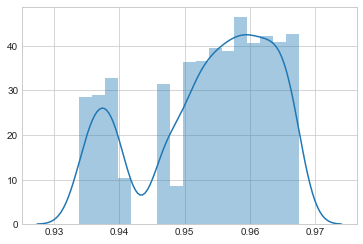

In [55]:
%%time
cut_kde = kde_optimise_cut(val_df, top_perc=0.05, br=10, w_factor=250000/50000)

Mean cut at 0.9551574 corresponds to AMS of 3.7205423959039963
Maximum AMS for data is 3.8146826122764987 at cut of 0.9644319415092468
CPU times: user 51.5 ms, sys: 2.61 ms, total: 54.2 ms
Wall time: 52.4 ms


/Users/giles/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/giles/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


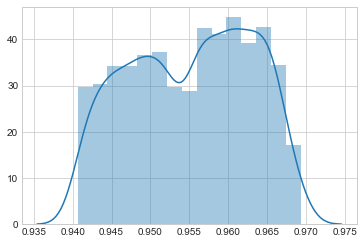

In [13]:
%%time
cut_mean = mean_optimise_cut(val_df, top_perc=0.05, br=10, w_factor=250000/50000)

## Response on validation data with TTA

In [84]:
val_fy = HEPAugFoldYielder(train_feats, h5py.File(DATA_PATH/'val.hdf5', "r+"), rot_mult=1)

Augmenting via phi rotations
Augmenting via y flips
Augmenting via longitunidnal flips
Total augmentation multiplicity is 4


In [85]:
fold_ensemble_predict(ensemble, weights, val_fy, pred_name='pred_TTA', ensemble_size=ensemble_size, verbose=1)

Predicting fold 1 out of 10
Prediction took 0.0001443755444000999s per sample

Predicting fold 2 out of 10
Prediction took 0.00011198655419993884s per sample

Predicting fold 3 out of 10
Prediction took 0.00011303867399983573s per sample

Predicting fold 4 out of 10
Prediction took 0.00011222914019999735s per sample

Predicting fold 5 out of 10
Prediction took 0.00011377630959996168s per sample

Predicting fold 6 out of 10
Prediction took 0.00012572792020000635s per sample

Predicting fold 7 out of 10
Prediction took 0.00014036015139990923s per sample

Predicting fold 8 out of 10
Prediction took 0.0001439895288000116s per sample

Predicting fold 9 out of 10
Prediction took 0.00011751515219984867s per sample

Predicting fold 10 out of 10
Prediction took 0.00011499382660003903s per sample



In [86]:
val_df_tta = convert_to_df(val_fy.source, pred_name='pred_TTA')

50000 candidates loaded


In [87]:
print('Testing ROC AUC: unweighted {}, weighted {}'.format(roc_auc_score(val_df_tta.gen_target, val_df_tta.pred_class),
                                                           roc_auc_score(val_df_tta.gen_target, val_df_tta.pred_class, sample_weight=val_df_tta.gen_weight)))

Testing ROC AUC: unweighted 0.9026484205239176, weighted 0.9357230195427433


/Users/giles/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/giles/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


Best cut at 0.9627022372113095 corresponds to AMS of 3.822526390935919
Maximum AMS for data is 3.874547336531232 at cut of 0.9616297483444214
CPU times: user 12.8 s, sys: 12.6 ms, total: 12.8 s
Wall time: 12.8 s


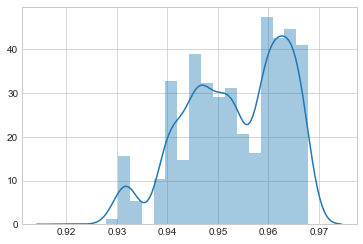

In [88]:
%%time
cut_kde_tta = kde_optimise_cut(val_df_tta, top_perc=0.05, br=10, w_factor=250000/50000)

Mean cut at 0.95336074 corresponds to AMS of 3.8152367468284942
Maximum AMS for data is 3.9945258406390196 at cut of 0.9623297452926636
CPU times: user 94.5 ms, sys: 12.2 ms, total: 107 ms
Wall time: 52.9 ms


/Users/giles/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/giles/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


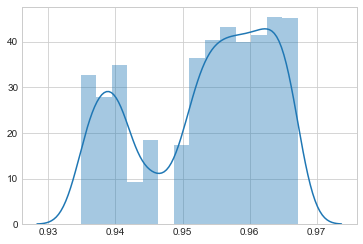

In [75]:
%%time
cut_mean_tta = mean_optimise_cut(val_df_tta, top_perc=0.05, br=10, w_factor=250000/50000)

# Test scoring - Without TTA

In [ ]:
test_fy = FoldYielder(h5py.File(DATA_PATH/'testing.hdf5', "r+"))

In [ ]:
%%time
fold_ensemble_predict(ensemble, weights, test_fy, ensemble_size=ensemble_size, verbose=1)

In [ ]:
score_test_data(test_fy.source, cut_kde)

In [ ]:
score_test_data(test_fy.source, cut_mean)

# Test scoring - With TTA

In [ ]:
test_fy = HEPAugFoldYielder(train_feats, h5py.File(DATA_PATH/'testing.hdf5', "r+"),
                            input_pipe=None, rot_mult=8)

In [ ]:
%%time
fold_ensemble_predict(ensemble, weights, test_fy, pred_name='pred_TTA', ensemble_size=ensemble_size, verbose=1)

In [ ]:
score_test_data(test_fy.source, cut_kde_tta, pred_name='pred_TTA')

In [ ]:
score_test_data(test_fy.source, cut_mean_tta, pred_name='pred_TTA')

# Save/Load

In [ ]:
name = "weights/Swish_CLR_TTA"

In [ ]:
saveEnsemble(name, ensemble, weights, compile_args, overwrite=1)

In [ ]:
ensemble, weights, compile_args, _, _ = loadEnsemble(name)